# Librerias/Paquetes

In [ ]:
# Basic packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
import datetime as dt   

# Machine learning packages 
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reducción de dimensiones 
from sklearn.decomposition import PCA

# Regresión lineal 
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras import Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-04-11 19:24:47--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 74.125.128.102, 74.125.128.101, 74.125.128.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.128.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/57dna1hb8qq9mtastdggv6q1hhffqull/1681241025000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=05ba4e78-561a-4905-ae9c-e6217757e03b [following]
--2023-04-11 19:24:49--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/57dna1hb8qq9mtastdggv6q1hhffqull/1681241025000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=05ba4e78-561a-4905-ae9c-e6217757e03b
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 108.177.126.132, 

In [ ]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')

df.set_index('Date', inplace=True)

In [101]:
df.head(-1)

,Colombia,Bogota,Caribe Mar,Antioquia,Caribe Sol,Cali,Santander,Boyaca,Valle del Cauca,Meta,...,Cauca,Nariño,Pereira,Casanare,Quindio,Choco,Tulua,Cartago,Costa Caribe,Valle del Sibundoy
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30 23:59:59.962,7140559.26,1320792.69,1224290.37,899450.34,1090389.39,414176.69,350902.86,278981.87,264640.87,157696.69,...,98578.43,63232.62,56584.97,54231.09,42546.54,24259.00,22226.42,18485.01,4134.73,956.50
2020-10-01 00:59:59.962,6889229.54,1265863.83,1188898.49,852134.53,1053745.78,397509.19,338021.81,291912.15,258723.10,154469.65,...,95748.21,58963.14,53894.29,52937.00,39641.78,21787.79,21468.45,17933.59,4100.38,887.62
2020-10-01 01:59:59.962,6768128.26,1242928.76,1164769.75,843323.57,1022801.61,386700.22,333269.26,304934.61,250411.11,152529.17,...,93315.29,57276.91,52370.15,50573.76,38634.57,23169.62,20459.32,17417.63,4069.11,853.63
2020-10-01 02:59:59.962,6701299.05,1260574.75,1132657.87,848113.38,992043.52,380463.87,324627.44,309025.29,248248.85,153509.13,...,94824.47,57305.74,52095.61,49493.68,38229.84,21423.47,20267.58,17464.35,4065.57,839.21
2020-10-01 03:59:59.962,6806767.20,1325971.00,1120738.54,888338.01,975121.31,384215.95,321360.54,317756.70,252769.41,154665.14,...,99061.18,60415.12,53296.95,49035.41,39145.05,21137.06,19941.27,17853.03,4051.39,885.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 17:59:59.958,8923913.77,1716030.60,1354149.86,1196099.22,1083044.88,417479.87,443201.44,415440.23,288716.77,394568.67,...,129147.94,120701.93,85187.32,74533.46,74162.61,32967.93,29704.03,22965.06,11341.84,1908.55
2022-12-31 18:59:59.958,8908315.14,1684451.43,1357901.50,1170563.26,1089049.32,420256.38,440737.66,415446.21,300430.99,393999.19,...,133492.59,126064.59,83567.23,73987.24,73895.22,33919.83,30488.61,22737.66,11303.54,2016.91
2022-12-31 19:59:59.958,8523440.52,1596077.54,1305581.21,1105249.12,1053903.62,402457.48,420362.13,399837.12,289644.00,388279.78,...,129098.94,116102.61,79505.56,70900.51,69885.98,32469.87,28857.69,21266.53,11214.87,1846.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19728 entries, 2020-09-30 23:59:59.962000 to 2022-12-31 22:59:59.958000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Colombia             19728 non-null  float64
 1   Bogota               19728 non-null  float64
 2   Caribe Mar           19728 non-null  float64
 3   Antioquia            19728 non-null  float64
 4   Caribe Sol           19728 non-null  float64
 5   Cali                 19728 non-null  float64
 6   Santander            19728 non-null  float64
 7   Boyaca               19728 non-null  float64
 8   Valle del Cauca      19728 non-null  float64
 9   Meta                 19728 non-null  float64
 10  Norte de Sanatender  19728 non-null  float64
 11  Caldas               19728 non-null  float64
 12  Tolima               19728 non-null  float64
 13  Huila                19728 non-null  float64
 14  Cauca                19728 non-null  

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.describe()

,Colombia,Bogota,Caribe Mar,Antioquia,Caribe Sol,Cali,Santander,Boyaca,Valle del Cauca,Meta,...,Cauca,Nariño,Pereira,Casanare,Quindio,Choco,Tulua,Cartago,Costa Caribe,Valle del Sibundoy
count,1.972800e+04,1.972800e+04,1.972800e+04,1.972800e+04,1.972800e+04,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,...,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000
mean,8.520192e+06,1.807964e+06,1.219146e+06,1.185503e+06,1.084959e+06,466686.253226,404478.881664,382545.774393,297607.805125,241126.564176,...,118725.156032,98013.693317,78301.319537,65949.009244,59679.457872,29574.782567,27083.359705,22926.530593,18478.418195,1476.075680
std,1.093714e+06,3.357052e+05,1.207211e+05,2.103032e+05,1.050221e+05,90049.921783,58095.453927,43134.607242,42890.528684,42931.755896,...,20203.255991,23092.035719,16647.526556,10140.697160,13221.226402,5514.486243,5147.476119,4598.685197,4637.772815,424.663737
min,5.389560e+06,9.323532e+05,8.200898e+05,6.655529e+05,7.435277e+05,230292.470000,273547.250000,250470.700000,150879.650000,69241.370000,...,57368.720000,22987.180000,41426.100000,19236.070000,34369.780000,721.380000,10975.770000,5820.730000,334.010000,1.340000
25%,7.544031e+06,1.496971e+06,1.133439e+06,9.890094e+05,1.006931e+06,387911.067500,349145.052500,352816.957500,263498.635000,211564.645000,...,102148.172500,76115.875000,62028.442500,58117.160000,45813.272500,25074.640000,22345.570000,18802.190000,16128.320000,1094.820000
50%,8.592540e+06,1.851653e+06,1.217416e+06,1.199002e+06,1.088679e+06,460237.160000,407030.285000,381836.640000,297215.985000,234802.960000,...,120914.495000,105358.605000,78915.250000,65902.820000,62314.215000,30362.460000,27073.905000,22927.440000,18674.260000,1522.900000
75%,9.507811e+06,2.125857e+06,1.305449e+06,1.382209e+06,1.161113e+06,548786.922500,457124.092500,411522.805000,333971.752500,264663.655000,...,132537.840000,113206.272500,94126.175000,73933.610000,71361.767500,33448.482500,31595.925000,27203.895000,21526.457500,1698.575000
max,1.078689e+07,2.357194e+06,1.601461e+06,1.564164e+06,1.383224e+06,674006.860000,527920.810000,518485.300000,405763.410000,415640.860000,...,189113.070000,461849.760000,108883.020000,94536.780000,84428.180000,154800.600000,39683.090000,32790.120000,31110.880000,2741.200000


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

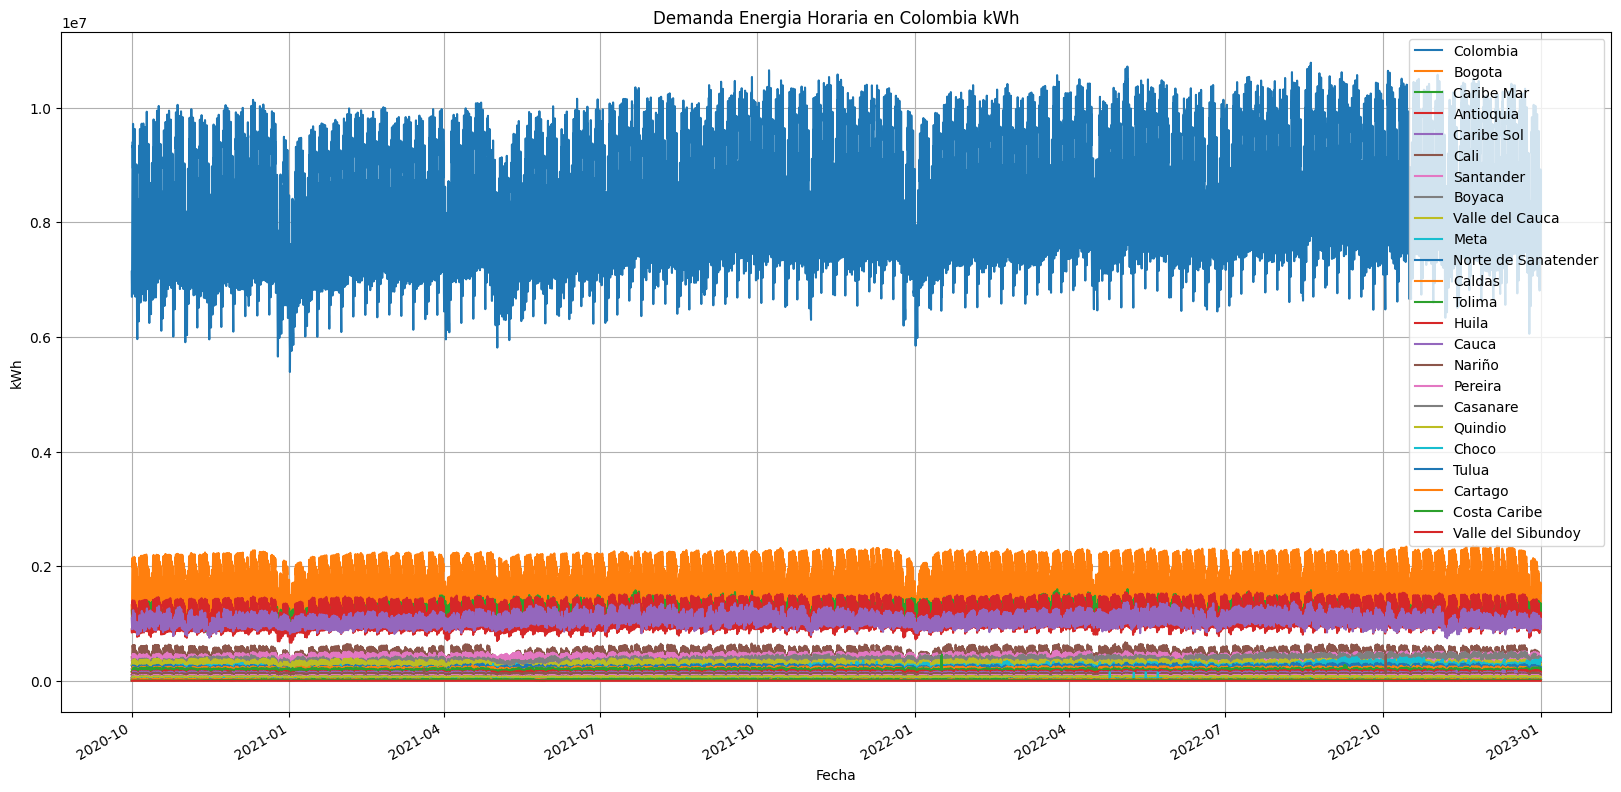

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha')

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

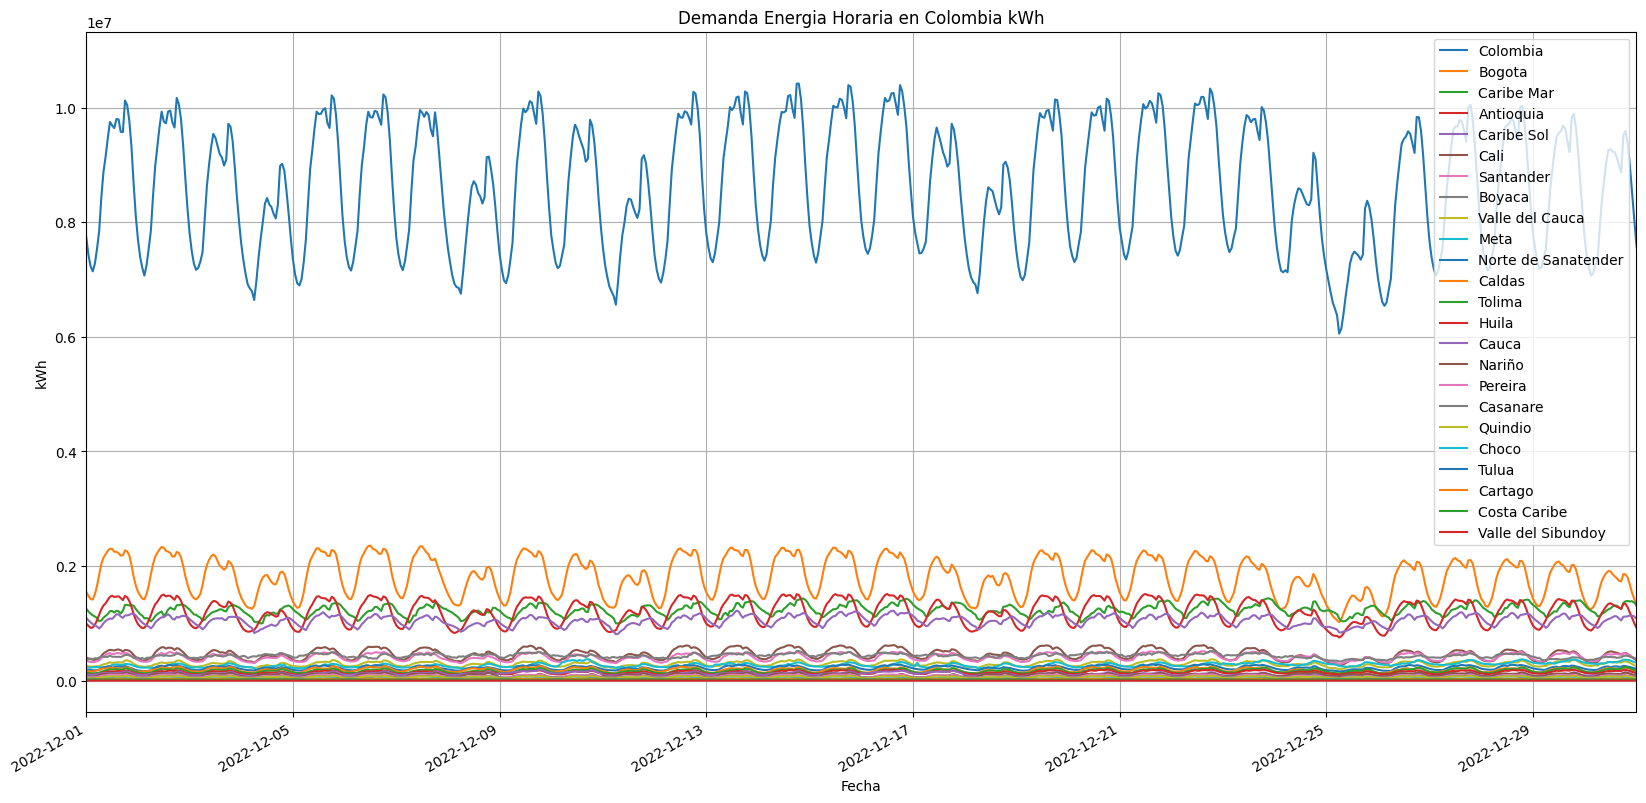

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

In [ ]:
a=df['Colombia']
a=pd.DataFrame(a)
a=a.values
a=pd.DataFrame(a)

In [ ]:
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
a.set_index(date_rng[0:-1], inplace=True)

In [ ]:
a.head(-1)

,0
2020-10-01 00:00:00,7140559.26
2020-10-01 01:00:00,6889229.54
2020-10-01 02:00:00,6768128.26
2020-10-01 03:00:00,6701299.05
2020-10-01 04:00:00,6806767.20
...,...
2022-12-31 18:00:00,8923913.77
2022-12-31 19:00:00,8908315.14
2022-12-31 20:00:00,8523440.52
2022-12-31 21:00:00,8065376.64


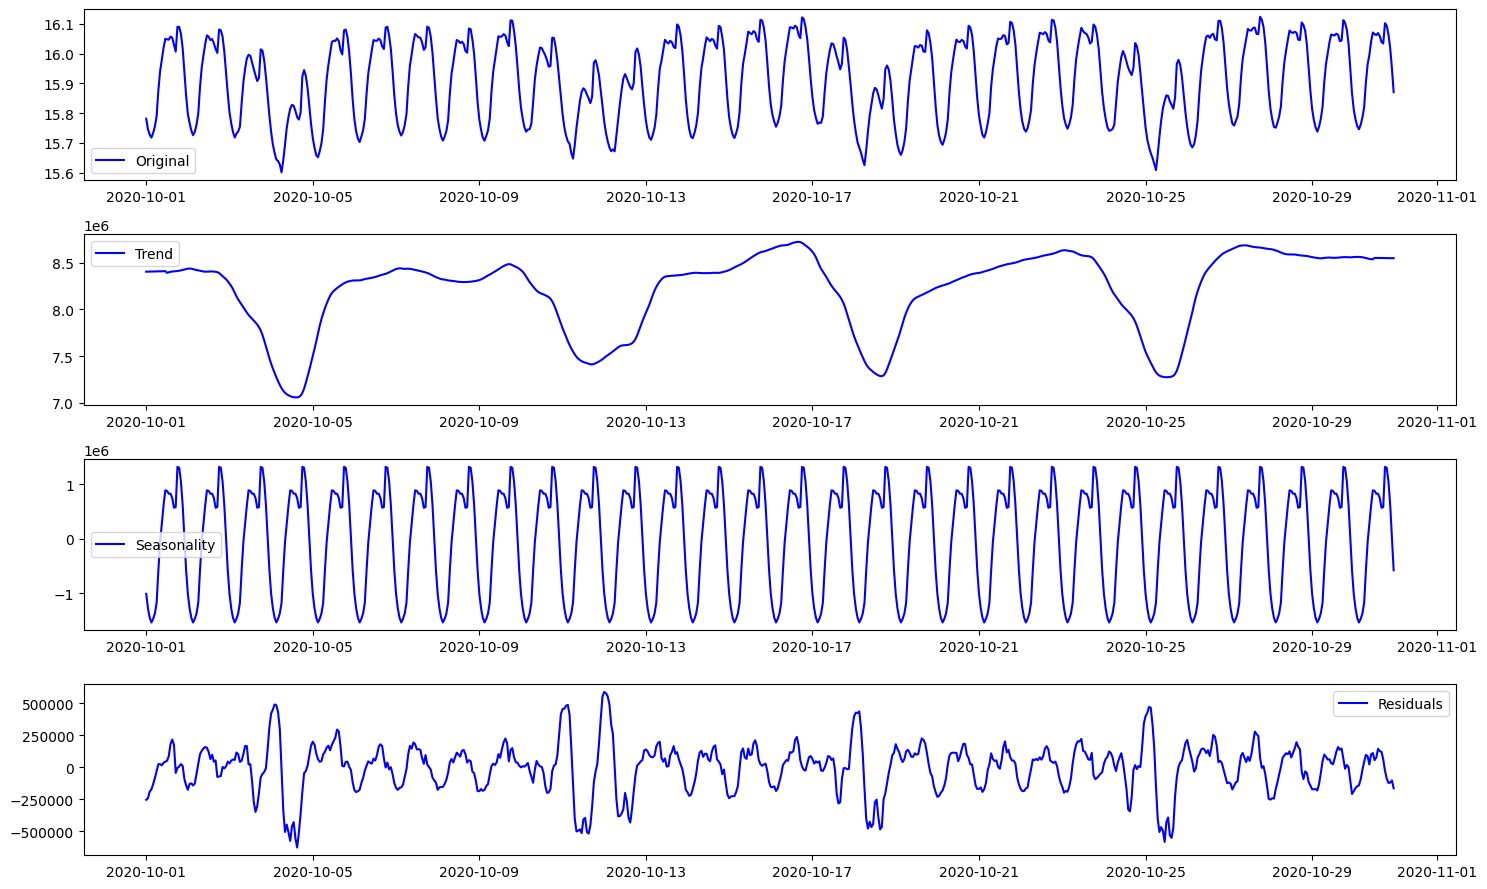

In [ ]:
decomposition_add = seasonal_decompose(a[0:720], model='additive', extrapolate_trend='freq')

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

# Plot gathered statistics
plt.figure(figsize=(15,9))
plt.subplot(411)
plt.plot(np.log(a[0:720]), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

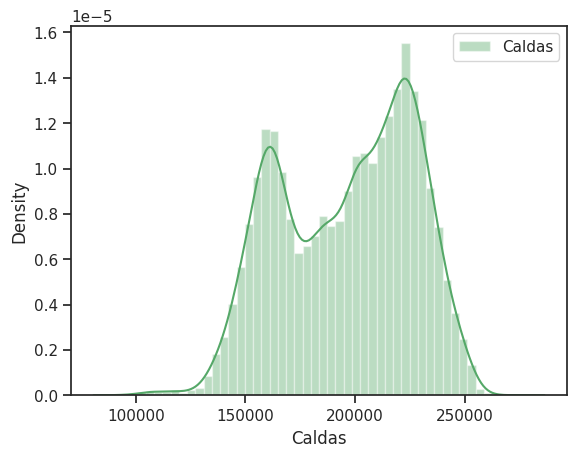

In [103]:
#Plotting Histograms
sns.set_theme(style="ticks")
Nbins = int(1 + 3.322*np.log2(df.shape[0]))
sns.distplot(df['Caldas'],bins=Nbins,color='g',label='Caldas')
plt.legend()

<Axes: >

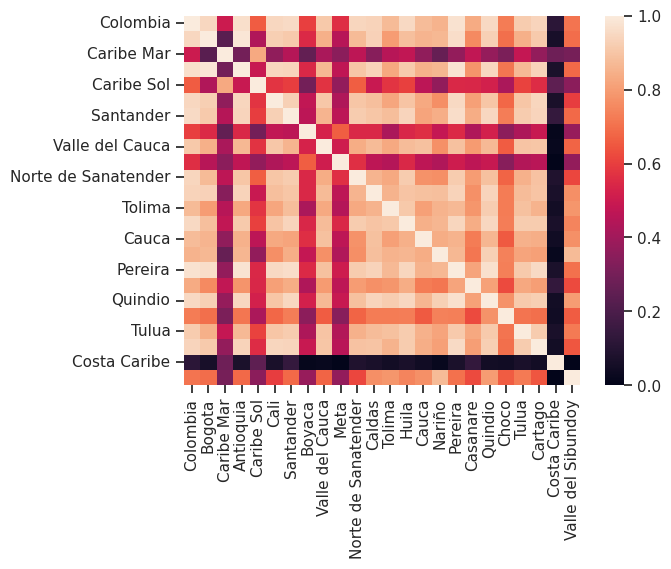

In [ ]:
# Correlation Heatmap
plt.figure() 
sns.heatmap(df.corr(), vmin=0)

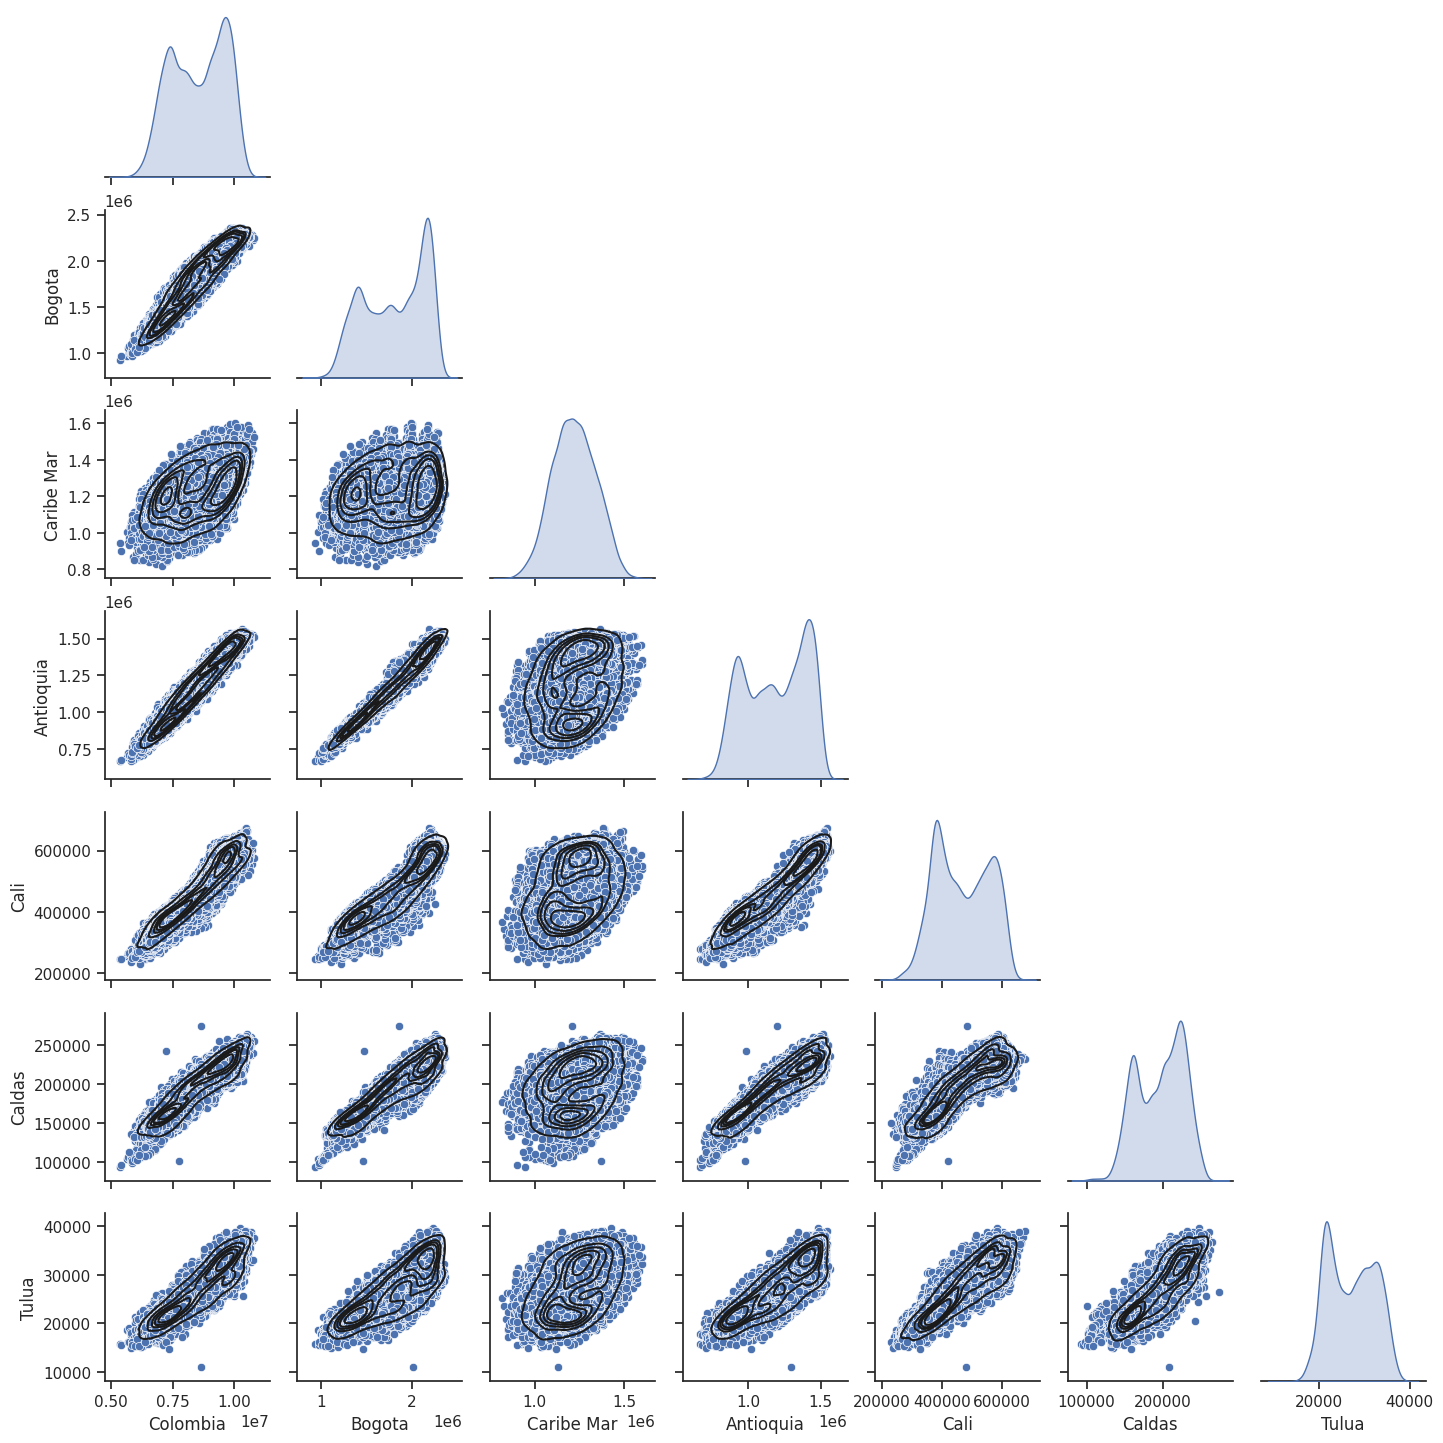

In [104]:
g=sns.pairplot(data=df[['Colombia','Bogota','Caribe Mar','Antioquia','Cali','Caldas','Tulua']], size=2.1, diag_kind='kde', corner=True);
g.map_lower(sns.kdeplot, levels=6, color=".1")

# Normalizacion y Particion

In [ ]:
df1=df.copy()
# #scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)

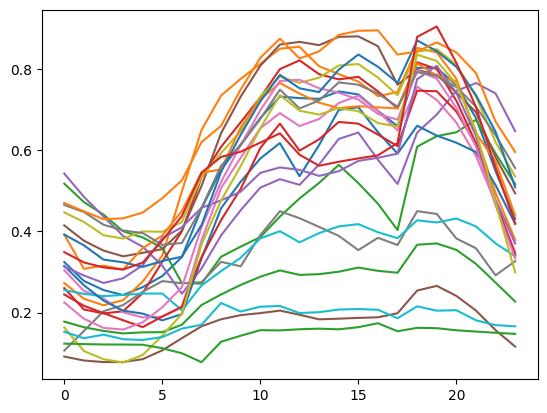

In [ ]:
plt.plot(df1[0:24])
plt.show()

In [ ]:
df1.shape

(19728, 24)

In [ ]:
Ts1=df1[:,1:]
out=df1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 23)
Tamaño Serie Salida:  (19728,)


In [ ]:
b=np.arange(0,len(out))

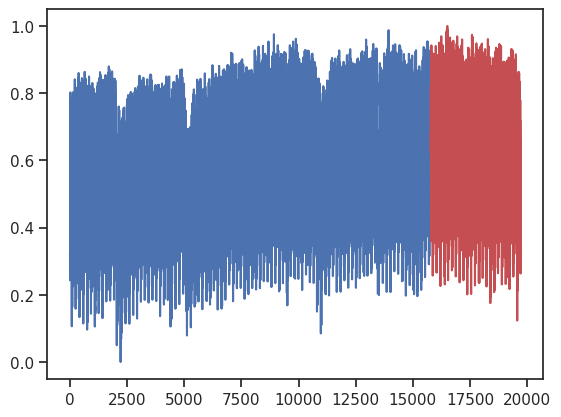

In [ ]:
plt.plot(b[0:int(len(out)*0.8)],out[0:int(len(out)*0.8)],c='b')
plt.plot(b[int(len(out)*0.8):],out[int(len(out)*0.8):],c='r')
plt.show()

In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 24

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1.reshape(len(X_test1),step_back)
# X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1.reshape(len(Y_test1))
# Y_train1=Y_train1.reshape(len(Y_train1))



In [ ]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15762, 24, 23) Tamaño Y_train1:  (15762,)
Tamaño X_test1:  (3941, 24, 23) Tamaño Y_test1:  (3941,)
-----------------------------------------------------------------------
